In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
sns.set(style="white",color_codes=True)

In [2]:
HouseDS=pd.read_csv("HousePS.csv")
HouseDS.head()

,Title,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Views,Area,Road,Road Width,Road Type,Amenities
0,2 Room Available : Flat For Sale In Shrijana C...,"Pokhara 8, Pratibha marga, Shrijana Chowk, Pok...",Pokhara,11000.0,1,0,3.0,0,206,0-7-0-0 Ropani,12 Feet / Blacktopped,12 Feet,Blacktopped,"['Balcony', 'Drainage']"
1,Space On Rent For Office And Restaurant ... Ba...,"naya baneshwor, Baneshwor, Kathmandu",Kathmandu,495000.0,0,0,2.0,0,182,1100 Sq. Feet,0 Feet,0 Feet,NaN,"['Lift', 'Parking', 'CCTV']"
2,"House For Rent In Gatthaghar, Bhaktapur","Near Nagrik Hospital Gatthaghar, Gatthaghar, B...",Bhaktapur,60000.0,5,0,0.0,6,180,500 Sq. Feet,20 Feet / Blacktopped,20 Feet,Blacktopped,"['Balcony', 'Modular Kitchen', 'Wifi', 'Water ..."
3,"Office Space For Rent In Gatthaghar, Bhaktapur","Gatthaghar Nagrik Hospital, Gatthaghar, Bhaktapur",Bhaktapur,11000.0,0,0,0.0,5,176,200 Sq. Feet,20 Feet / Soil Stabilized,20 Feet,Soil Stabilized,"['Parking', 'Internet', 'Wifi', 'Balcony', 'Dr..."
4,4 Ropani Land For Sale At Budhanilkantha : Lan...,"Budhanilkantha, Budhanilkantha, Kathmandu",Kathmandu,3500000.0,0,0,2.0,0,325,0-64-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,[]


In [3]:
HouseDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2211 entries, 0 to 2210
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       2211 non-null   object 
 1   Address     2211 non-null   object 
 2   City        2211 non-null   object 
 3   Price       2211 non-null   float64
 4   Bedroom     2211 non-null   int64  
 5   Bathroom    2211 non-null   int64  
 6   Floors      2211 non-null   float64
 7   Parking     2211 non-null   int64  
 8   Views       2211 non-null   int64  
 9   Area        2211 non-null   object 
 10  Road        2211 non-null   object 
 11  Road Width  2211 non-null   object 
 12  Road Type   1426 non-null   object 
 13  Amenities   2211 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 242.0+ KB


In [4]:
def parse_road_width(x):
    qty,measure=x.split(' ')[0],x.split(' ')[1]
    if measure =='Feet':
        return float(qty)*0.3048
    return float(qty)
HouseDS['road_width_meters']=HouseDS['Road Width'].astype('str').apply(parse_road_width)
del HouseDS['Road Width']
del HouseDS['Views']
del HouseDS['Title']

In [5]:
#LabelEncoding to convert String value to Numeric value
le = LabelEncoder()
HouseDS['City'] = le.fit_transform(HouseDS['City'])
HouseDS['Address'] = le.fit_transform(HouseDS['Address'])
HouseDS['Road Type'] = le.fit_transform(HouseDS['Road Type'])
HouseDS.head()

,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Area,Road,Road Type,Amenities,road_width_meters
0,1137,27,11000.0,1,0,3.0,0,0-7-0-0 Ropani,12 Feet / Blacktopped,1,"['Balcony', 'Drainage']",3.6576
1,1536,17,495000.0,0,0,2.0,0,1100 Sq. Feet,0 Feet,6,"['Lift', 'Parking', 'CCTV']",0.0000
2,886,3,60000.0,5,0,0.0,6,500 Sq. Feet,20 Feet / Blacktopped,1,"['Balcony', 'Modular Kitchen', 'Wifi', 'Water ...",6.0960
3,435,3,11000.0,0,0,0.0,5,200 Sq. Feet,20 Feet / Soil Stabilized,5,"['Parking', 'Internet', 'Wifi', 'Balcony', 'Dr...",6.0960
4,219,17,3500000.0,0,0,2.0,0,0-64-0-0 Aana,20 Feet / Blacktopped,1,[],6.0960


In [6]:
# Define the list of amenities
amenities_list =['Parking','Wifi','Drainage','Water Supply','Internet', 'CCTV', 'Electricity Backup', 'Garden','Balcony']

In [7]:
# Create binary columns for each amenity
for amenity in amenities_list:
    HouseDS[amenity] = HouseDS['Amenities'].apply(lambda x: 1 if amenity in x else 0)

In [8]:
#Sorting value of price in Descending order,Higher Price appears first 
HouseDS=HouseDS.sort_values(by=['Price'],ascending=False)

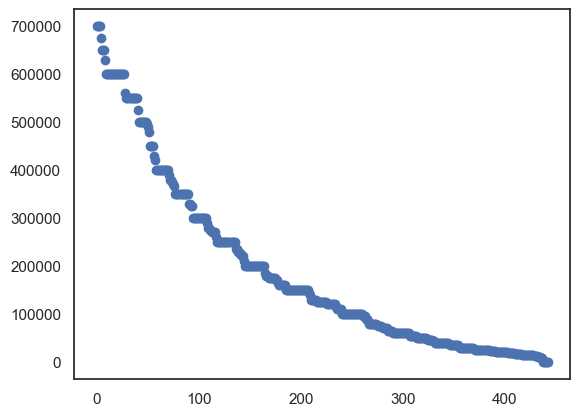

In [9]:
#Scatter plot with excluding top 20% price
exclude_top=int(0.8*len(HouseDS.Price))
plt.scatter(np.arange(0,len(HouseDS.Price[exclude_top:])),HouseDS.Price[exclude_top:])

In [10]:
#splitting Data set into Training and testing sets
X=HouseDS.drop(['Price','Area','Road','Amenities'],axis=1)
y=HouseDS['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

array([[<Axes: title={'center': 'Address'}>,
        <Axes: title={'center': 'City'}>,
        <Axes: title={'center': 'Bedroom'}>,
        <Axes: title={'center': 'Bathroom'}>],
       [<Axes: title={'center': 'Floors'}>,
        <Axes: title={'center': 'Parking'}>,
        <Axes: title={'center': 'Road Type'}>,
        <Axes: title={'center': 'road_width_meters'}>],
       [<Axes: title={'center': 'Wifi'}>,
        <Axes: title={'center': 'Drainage'}>,
        <Axes: title={'center': 'Water Supply'}>,
        <Axes: title={'center': 'Internet'}>],
       [<Axes: title={'center': 'CCTV'}>,
        <Axes: title={'center': 'Electricity Backup'}>,
        <Axes: title={'center': 'Garden'}>,
        <Axes: title={'center': 'Balcony'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

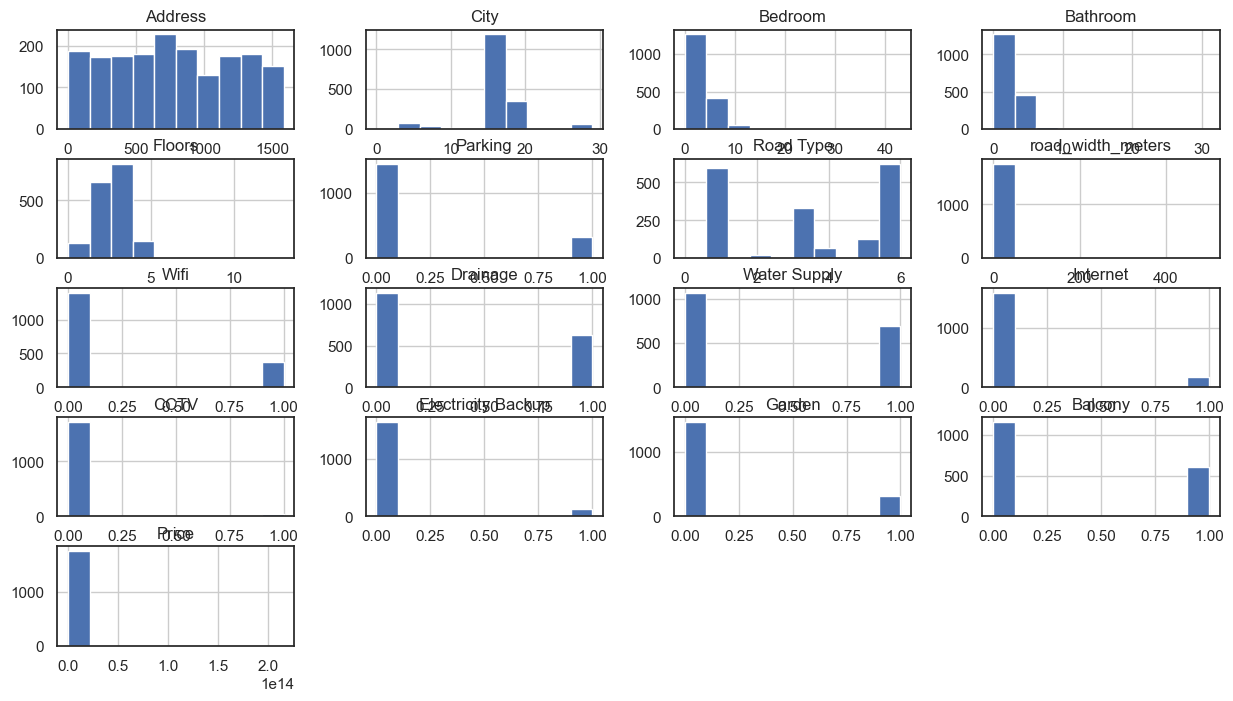

In [11]:
train_data=X_train.join(y_train)
train_data.hist(figsize=(15,8))

In [32]:
'''plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGrBu")
train_data.corr()'''

'plt.figure(figsize=(15,8))\nsns.heatmap(train_data.corr(),annot=True,cmap="YlGrBu")\ntrain_data.corr()'

In [13]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1768, 16) (443, 16) (1768,) (443,)


In [14]:
#feature scaling(to normalize feature variables)
#np.random.seed(42)with_mean=False
scaler = StandardScaler()
#X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2,random_state=1)
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)

In [15]:
svm_model=SVR(kernel='linear')

In [16]:
#Training the model
svm_model.fit(X_train_scale,y_train)

SVR(kernel='linear')

In [33]:
#Making predictions on test set
pred_price=svm_model.predict(X_test_scale)
#print("Your Predicted Price is ",pred_price)

In [18]:
#Evaluating the model
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,pred_price)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred_price)

In [19]:
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
HouseDS.head()

Mean Squared Error (MSE): 5.188269276508958e+25
Root Mean Squared Error (RMSE): 7202964165195.436
R-squared (R2): -0.004275250629327987


,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Area,Road,Road Type,Amenities,road_width_meters,Wifi,Drainage,Water Supply,Internet,CCTV,Electricity Backup,Garden,Balcony
662,1286,17,2.160000e+14,0,0,4.0,0,0-8-1-0 Aana,12 Feet / Paved,4,[],3.6576,0,0,0,0,0,0,0,0
695,1406,7,1.440000e+14,0,0,3.0,0,11:10 Kattha,10 Feet / Soil Stabilized,5,[],3.0480,0,0,0,0,0,0,0,0
2171,126,3,1.400000e+14,5,7,4.0,0,0-4-0-0 Aana,13 Feet / Gravelled,3,[],3.9624,0,0,0,0,0,0,0,0
1024,1562,17,1.300000e+14,2,1,1.0,0,0-2 -0-2 Aana,10 Feet / Soil Stabilized,5,"['Water Well', 'Water Tank', 'Water Supply', '...",3.0480,0,1,1,0,0,0,0,0
585,353,17,9.900000e+13,0,0,4.0,0,3 Aana,12 Feet / Blacktopped,1,[],3.6576,0,0,0,0,0,0,0,0


In [20]:
'''new_house=[[1286,17,5,6,3,5,5,3.6576]]
new_house_scale=scaler.transform(new_house)
pred_price=svm_model.predict(new_house)
print("Your Predicted Price is ",pred_price)'''

'new_house=[[1286,17,5,6,3,5,5,3.6576]]\nnew_house_scale=scaler.transform(new_house)\npred_price=svm_model.predict(new_house)\nprint("Your Predicted Price is ",pred_price)'

In [21]:
#data->(Bedroom,Bathroom,Floors,ParkingSpace,Views(Visually Attractive),City,Address)
'''def House_requirement():
    No_of_Bedroom=int(input("Enter Number of bedrooms: "))
    No_of_Bathroom=int(input("Enter Number of bathrooms: "))
    No_of_Floors=float(input("Enter Number of floors: "))
    No_of_Parking=int(input("Enter Number of Parking Space: "))
    #Address=input("Enter the address of house: ")
    #City=input("Enter the City of house located: ")
    new_house=[[No_of_Bedroom,No_of_Bathroom,No_of_Floors,No_of_Parking]]
    new_house_scale=scaler.transform(new_house)
    pred_price=svm_model.predict(new_house_scale)
    print("Your Predicted Price is ",pred_price)
House_requirement() '''

'def House_requirement():\n    No_of_Bedroom=int(input("Enter Number of bedrooms: "))\n    No_of_Bathroom=int(input("Enter Number of bathrooms: "))\n    No_of_Floors=float(input("Enter Number of floors: "))\n    No_of_Parking=int(input("Enter Number of Parking Space: "))\n    #Address=input("Enter the address of house: ")\n    #City=input("Enter the City of house located: ")\n    new_house=[[No_of_Bedroom,No_of_Bathroom,No_of_Floors,No_of_Parking]]\n    new_house_scale=scaler.transform(new_house)\n    pred_price=svm_model.predict(new_house_scale)\n    print("Your Predicted Price is ",pred_price)\nHouse_requirement() '

In [22]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [23]:
# Create a Random Forest Regressor and Train the model using the training sets 
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
#Prediction on train Data
y_pred = rf.predict(X_train)
y_pred

array([37093000.        , 10973650.        , 77800553.18095239, ...,
        9576550.        , 41029000.        , 10095620.        ])

In [25]:
# Model Evaluation
from sklearn import metrics
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7816072182305281
Adjusted R^2: 0.7796116245650161
MAE: 375132237022.00397
MSE: 1.280160211369834e+25
RMSE: 3577932659189.9883


In [26]:
'''new_house=[[100,5,6,6,3,6,5,6.5]]
new_house_scale=scaler.transform(new_house)
pred_price=rf.predict(new_house)
print("Your Predicted Price is ",pred_price)'''

'new_house=[[100,5,6,6,3,6,5,6.5]]\nnew_house_scale=scaler.transform(new_house)\npred_price=rf.predict(new_house)\nprint("Your Predicted Price is ",pred_price)'

In [27]:
HouseDS.describe()

,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Road Type,road_width_meters,Wifi,Drainage,Water Supply,Internet,CCTV,Electricity Backup,Garden,Balcony
count,2211.000000,2211.000000,2.211000e+03,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000
mean,774.190864,17.160561,4.065559e+11,3.033921,2.227047,2.679941,0.178652,3.556762,5.555273,0.215287,0.361375,0.396201,0.099502,0.026685,0.070556,0.177295,0.350972
std,447.623005,4.151105,7.566414e+12,4.009855,2.598992,1.025188,0.383147,2.146409,17.294831,0.411114,0.480508,0.489218,0.299403,0.161197,0.256140,0.382005,0.477382
min,0.000000,0.000000,9.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,399.500000,17.000000,1.300000e+06,0.000000,0.000000,2.000000,0.000000,1.000000,3.962400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,781.000000,17.000000,8.000000e+06,3.000000,2.000000,3.000000,0.000000,3.000000,4.572000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1166.500000,18.000000,2.650000e+07,5.000000,4.000000,3.000000,0.000000,6.000000,6.096000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1587.000000,31.000000,2.160000e+14,95.000000,40.000000,13.000000,1.000000,6.000000,500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
